<hr/>


# Machine learning models

Indicators which are used for training models are analyzed in indicators notebook

<hr/>


### Imports

In [1]:
import matplotlib
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import yfinance as yf
from talib.abstract import *
from datetime import datetime
from math import isclose
from prophet import Prophet

# Parameters

In [2]:
# 'AAPL', 'TSLA', 'AMD', 'NVDA', 'BTC-USD', 'LINK-USD', 'ADA-USD'
ticker = 'BTC-USD' 

# Prediction length
prediction_len=5

# Log prices
log=False

<hr/>

# Data reading

<hr/>

### Fetching daily candles from yahoo finance or minute candles from local folder

In [3]:
dt_start = dt.datetime(1990, 1, 1)
dt_end = dt.datetime.now()

df = yf.download(ticker, start=dt_start, end=dt_end, group_by="ticker") 
df.drop(['Adj Close'], axis=1, inplace=True)
df.columns = ['open', 'high', 'low', 'close', 'volume']
df 

[*********************100%***********************]  1 of 1 completed


open          high           low         close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-04-07  43207.500000  43860.699219  42899.906250  43503.847656   
2022-04-08  43505.136719  43903.019531  42183.289062  42287.664062   
2022-04-09  42282.078125  42786.816406  42183.253906  42782.136719   
2022-04-10  42781.089844  43376.378906  42021.207031  42207.671875   
2022-04-11  42178.109375  42419.265625  41897.148438  42293.972656   

                 volume  
Date                     
2014-09-17     21056800  
2014-09-18     34483200  
2014-09-19     37919700  
2014-09-20     36863600  
2014-09-21     26580100  
...                 ...  
2022-04-07  26101973106  
2022-04-08  27215995394  
2022-04-09  16050772496  
2022-04-10  17654475582  
2022-04-11  21552072704  

[2764 rows x 5 columns]

<hr/>

# Data processing

<hr/>

### Creating dataframe for facebook prophet

In [4]:
prophet_df = pd.DataFrame()
prophet_df[['ds', 'y']] = df.reset_index()[['Date', 'close']]

if log:
    prophet_df['y'] = np.log2(prophet_df['y'])

prophet_df

ds             y
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
2759 2022-04-07  43503.847656
2760 2022-04-08  42287.664062
2761 2022-04-09  42782.136719
2762 2022-04-10  42207.671875
2763 2022-04-11  42293.972656

[2764 rows x 2 columns]

<hr/>

# Model training and evaluating

<hr/>

In [5]:
index = -70
data = prophet_df[index:index+30]
data.tail(n=3)

ds             y
2721 2022-02-28  43193.234375
2722 2022-03-01  44354.636719
2723 2022-03-02  43924.117188

In [6]:
model = Prophet().fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [7]:
future = model.make_future_dataframe(periods=prediction_len)
forecast = model.predict(future)

#forecast[-(5 + prediction_len):]

In [8]:
forecast.set_index('ds', inplace=True)

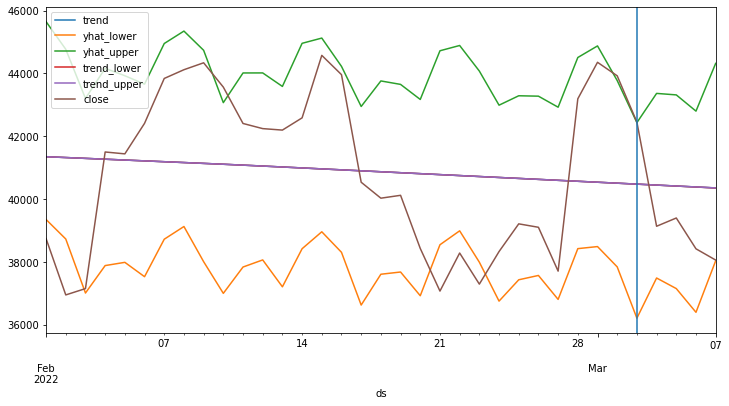

In [9]:
fig, ax = plt.subplots()
forecast[['trend','yhat_lower','yhat_upper','trend_lower','trend_upper']].join(df['close']).plot(figsize=(12,6), ax=ax)
ax.axvline(prophet_df.iloc[index+30].ds)
plt.show()